In [ ]:
!nvidia-smi

Thu Nov 21 06:50:50 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Get content

In [ ]:
!pip install faiss-cpu -q
!pip install beautifulsoup4 -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 59.3 MB/s eta 0:00:00


In [116]:
from bs4 import BeautifulSoup
import requests

query = "RAG system?"


url = f"https://www.google.com/search?q={query.replace(' ', '+')}"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    urls = []
    gfg = 0
    for g in soup.find_all('a'):
        href = g.get('href')
        if href and "/url?esrc=s&q=&rct=j&sa=U&url=" in href:
            link = href.split("/url?esrc=s&q=&rct=j&sa=U&url=")[1].split("&")[0]
            #print(link)
            #if (link.split("https://")[1].split(".")[0] != "scholar"):
            urls.append(link)
else:
    print("Failed to fetch results")



In [117]:
len(urls)

17

In [118]:
urls

['https://cloud.google.com/use-cases/retrieval-augmented-generation',
 'https://aws.amazon.com/what-is/retrieval-augmented-generation/',
 'https://www.oracle.com/artificial-intelligence/generative-ai/retrieval-augmented-generation-rag/',
 'https://www.oracle.com/ie/artificial-intelligence/generative-ai/retrieval-augmented-generation-rag/',
 'https://www.oracle.com/in/artificial-intelligence/generative-ai/retrieval-augmented-generation-rag/',
 'https://www.oracle.com/sg/artificial-intelligence/generative-ai/retrieval-augmented-generation-rag/',
 'https://www.oracle.com/uk/artificial-intelligence/generative-ai/retrieval-augmented-generation-rag/',
 'https://blogs.nvidia.com/blog/what-is-retrieval-augmented-generation/',
 'https://www.datacamp.com/blog/what-is-retrieval-augmented-generation-rag',
 'https://en.wikipedia.org/wiki/Retrieval-augmented_generation',
 'https://www.willowtreeapps.com/craft/retrieval-augmented-generation',
 'https://research.ibm.com/blog/retrieval-augmented-genera

In [119]:
texts = []
final_urls = []
total = 0
for url in urls:
    success = False
    while not success:
        try:
            response = requests.get(url, headers=headers, timeout=10)

            if response.status_code == 200:
                soup = BeautifulSoup(response.text, 'html.parser')

                for tag in soup(['script', 'style', 'header', 'footer', 'nav']):
                    tag.decompose()

                page_text = ' '.join(tag.get_text() for tag in soup.find_all(['p', 'h1', 'h2', 'h3', 'li']))
                texts.append(page_text)
                success = True
                total += 1
                final_urls.append(url)
            else:
                print(f"Failed to fetch {url}: {response.status_code}")
                break
        except Exception as e:
            print(f"Error fetching {url}: {e}")
            break

    if (total == 3):
        break


In [120]:
final_urls

['https://cloud.google.com/use-cases/retrieval-augmented-generation',
 'https://aws.amazon.com/what-is/retrieval-augmented-generation/',
 'https://www.oracle.com/artificial-intelligence/generative-ai/retrieval-augmented-generation-rag/']

In [121]:
texts

['What is Retrieval-Augmented Generation (RAG)? RAG (Retrieval-Augmented Generation) is an AI framework that combines the strengths of traditional information retrieval systems (such as search and databases) with the capabilities of generative large language models (LLMs). By combining your data and world knowledge with LLM language skills, grounded generation is more accurate, up-to-date, and relevant to your specific needs. Check out this e-book to unlock your “Enterprise Truth.” How does Retrieval-Augmented Generation work? RAGs operate with a few main steps to help enhance generative AI outputs:\xa0 Retrieval and pre-processing: RAGs leverage powerful search algorithms to query external data, such as web pages, knowledge bases, and databases. Once retrieved, the relevant information undergoes pre-processing, including tokenization, stemming, and removal of stop words. Grounded generation: The pre-processed retrieved information is then seamlessly incorporated into the pre-trained L

In [122]:
len(texts)

3

In [123]:
len(texts[0]), len(texts[1]), len(texts[2])

(7083, 10109, 14907)

# Cleaning/Preprocessing

In [124]:
import re

def clean_text(text):
    text = re.sub(r"\[.*?\]", "", text)
    text = re.sub(r"\s+", " ", text)
    return text.strip()

texts[0] = clean_text(texts[0])
texts[1] = clean_text(texts[1])
texts[2] = clean_text(texts[2])

In [125]:
texts

['What is Retrieval-Augmented Generation (RAG)? RAG (Retrieval-Augmented Generation) is an AI framework that combines the strengths of traditional information retrieval systems (such as search and databases) with the capabilities of generative large language models (LLMs). By combining your data and world knowledge with LLM language skills, grounded generation is more accurate, up-to-date, and relevant to your specific needs. Check out this e-book to unlock your “Enterprise Truth.” How does Retrieval-Augmented Generation work? RAGs operate with a few main steps to help enhance generative AI outputs: Retrieval and pre-processing: RAGs leverage powerful search algorithms to query external data, such as web pages, knowledge bases, and databases. Once retrieved, the relevant information undergoes pre-processing, including tokenization, stemming, and removal of stop words. Grounded generation: The pre-processed retrieved information is then seamlessly incorporated into the pre-trained LLM. 

In [126]:
len(texts[0]), len(texts[1]), len(texts[2])

(7081, 10105, 14900)

In [127]:
final_text = " ".join(texts)
final_text

'What is Retrieval-Augmented Generation (RAG)? RAG (Retrieval-Augmented Generation) is an AI framework that combines the strengths of traditional information retrieval systems (such as search and databases) with the capabilities of generative large language models (LLMs). By combining your data and world knowledge with LLM language skills, grounded generation is more accurate, up-to-date, and relevant to your specific needs. Check out this e-book to unlock your “Enterprise Truth.” How does Retrieval-Augmented Generation work? RAGs operate with a few main steps to help enhance generative AI outputs: Retrieval and pre-processing: RAGs leverage powerful search algorithms to query external data, such as web pages, knowledge bases, and databases. Once retrieved, the relevant information undergoes pre-processing, including tokenization, stemming, and removal of stop words. Grounded generation: The pre-processed retrieved information is then seamlessly incorporated into the pre-trained LLM. T

In [128]:
len(final_text)

32088

# Knowledge base using sentence embenddings

In [129]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import faiss # Facebook AI Similarity Seacrh
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [130]:
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt_tab')

# Example corpus
corpus = final_text
sentences = sent_tokenize(corpus)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [131]:
sentences

['What is Retrieval-Augmented Generation (RAG)?',
 'RAG (Retrieval-Augmented Generation) is an AI framework that combines the strengths of traditional information retrieval systems (such as search and databases) with the capabilities of generative large language models (LLMs).',
 'By combining your data and world knowledge with LLM language skills, grounded generation is more accurate, up-to-date, and relevant to your specific needs.',
 'Check out this e-book to unlock your “Enterprise Truth.” How does Retrieval-Augmented Generation work?',
 'RAGs operate with a few main steps to help enhance generative AI outputs: Retrieval and pre-processing: RAGs leverage powerful search algorithms to query external data, such as web pages, knowledge bases, and databases.',
 'Once retrieved, the relevant information undergoes pre-processing, including tokenization, stemming, and removal of stop words.',
 'Grounded generation: The pre-processed retrieved information is then seamlessly incorporated in

In [132]:
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(sentences, convert_to_numpy = True)

In [133]:
embeddings.shape

(232, 384)

In [134]:
embeddings

array([[-0.12751824,  0.01289594, -0.01769432, ...,  0.02670551,
        -0.02776622,  0.02087011],
       [-0.06509098, -0.01325854,  0.02227048, ...,  0.03335963,
         0.01122819,  0.02471756],
       [ 0.04819336, -0.10355049,  0.00281728, ..., -0.00797717,
        -0.05605378, -0.00971238],
       ...,
       [-0.12919769,  0.0351914 ,  0.01423578, ..., -0.03317212,
         0.07071075, -0.0186689 ],
       [ 0.01188224,  0.0346556 , -0.04887683, ...,  0.00467257,
         0.04265281,  0.03269922],
       [-0.06443138, -0.00091817, -0.05409248, ...,  0.04765166,
         0.06305917,  0.02972038]], dtype=float32)

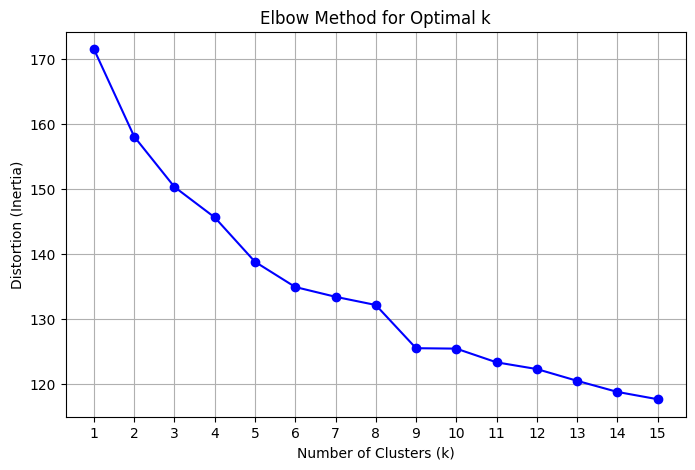

In [135]:
def elbow_method(embeddings, max_k=25):
    distortions = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(embeddings)
        distortions.append(kmeans.inertia_)
    return distortions

max_k = 15

distortions = elbow_method(embeddings, max_k=max_k)

plt.figure(figsize=(8, 5))
plt.plot(range(1, max_k + 1), distortions, marker='o', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.xticks(range(1, max_k + 1))
plt.grid()
plt.show()

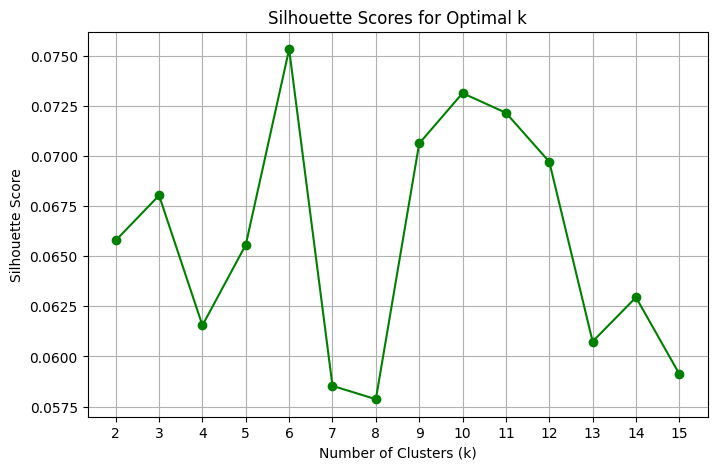

In [136]:
def silhouette_scores(embeddings, max_k=10):
    scores = []
    for k in range(2, max_k + 1):  # Silhouette score requires at least 2 clusters
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(embeddings)
        score = silhouette_score(embeddings, cluster_labels)
        scores.append(score)
    return scores

# Calculate silhouette scores
max_k = 15
silhouette_scores_list = silhouette_scores(embeddings, max_k=max_k)

# Plot the silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, max_k + 1), silhouette_scores_list, marker='o', color='g')
plt.title('Silhouette Scores for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, max_k + 1))
plt.grid()
plt.show()

In [137]:
n_clusters = 10

# Apply KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(embeddings)

# Get cluster labels
cluster_labels = kmeans.labels_

# Separate embeddings by clusters
chunks = {i: [] for i in range(n_clusters)}
for idx, label in enumerate(cluster_labels):
    chunks[label].append(embeddings[idx])

# Convert chunks to numpy arrays
chunks = {key: np.array(value) for key, value in chunks.items()}

In [138]:
chunks

{0: array([[ 0.00653037,  0.02076948, -0.00057105, ...,  0.09527557,
         -0.03733634,  0.01172701],
        [ 0.06162129, -0.05024869,  0.02451289, ...,  0.07237758,
         -0.10747138,  0.01706683],
        [ 0.04424914, -0.04170283,  0.01515204, ...,  0.01166166,
         -0.0299067 , -0.0134074 ],
        ...,
        [ 0.03797891, -0.02593031, -0.06811847, ...,  0.02276054,
         -0.02315169,  0.04700333],
        [ 0.01236148,  0.01259603, -0.00438966, ...,  0.11714011,
         -0.0023437 , -0.00465269],
        [-0.00024769, -0.08716257,  0.01316435, ..., -0.0325728 ,
         -0.05612245, -0.04530084]], dtype=float32),
 1: array([[-0.03932015, -0.03438421,  0.00565081, ...,  0.00046228,
          0.01067668,  0.03162077],
        [-0.05326812, -0.01492053, -0.04931074, ...,  0.00658254,
          0.09148338,  0.09207619],
        [-0.08577175, -0.02280188, -0.05356457, ...,  0.01025227,
          0.02800286,  0.07306206],
        [-0.02719283, -0.07455506, -0.07568567

In [139]:
faiss_indices = {}

for cluster_id, cluster_embeddings in chunks.items():
    dimension = cluster_embeddings.shape[1]
    index = faiss.IndexFlatL2(dimension)

    index.add(cluster_embeddings)

    faiss_indices[cluster_id] = index

In [140]:
faiss_indices

{0: <faiss.swigfaiss_avx512.IndexFlatL2; proxy of <Swig Object of type 'faiss::IndexFlatL2 *' at 0x7be735db7c30> >,
 1: <faiss.swigfaiss_avx512.IndexFlatL2; proxy of <Swig Object of type 'faiss::IndexFlatL2 *' at 0x7be5cdbad1a0> >,
 2: <faiss.swigfaiss_avx512.IndexFlatL2; proxy of <Swig Object of type 'faiss::IndexFlatL2 *' at 0x7be5cdbac570> >,
 3: <faiss.swigfaiss_avx512.IndexFlatL2; proxy of <Swig Object of type 'faiss::IndexFlatL2 *' at 0x7be5cdcda610> >,
 4: <faiss.swigfaiss_avx512.IndexFlatL2; proxy of <Swig Object of type 'faiss::IndexFlatL2 *' at 0x7be5cdcd9860> >,
 5: <faiss.swigfaiss_avx512.IndexFlatL2; proxy of <Swig Object of type 'faiss::IndexFlatL2 *' at 0x7be5cdcda520> >,
 6: <faiss.swigfaiss_avx512.IndexFlatL2; proxy of <Swig Object of type 'faiss::IndexFlatL2 *' at 0x7be5cdcd93e0> >,
 7: <faiss.swigfaiss_avx512.IndexFlatL2; proxy of <Swig Object of type 'faiss::IndexFlatL2 *' at 0x7be5cd5ce7c0> >,
 8: <faiss.swigfaiss_avx512.IndexFlatL2; proxy of <Swig Object of type '

# RAG pipeline

## Retrieval (3 nearest clusters using similarity search)

In [141]:
query_sentence = query
query_embedding = model.encode([query_sentence], convert_to_numpy=True)

predicted_cluster = kmeans.predict(query_embedding)[0]
relevant_index = faiss_indices[predicted_cluster]

D, I = relevant_index.search(query_embedding, k=5)  # Top 5 nearest neighbors

In [142]:
D

array([[0.56204164, 0.7153136 , 0.7776549 , 0.7838857 , 0.83863693]],
      dtype=float32)

In [143]:
I

array([[ 1, 19, 40, 25,  5]])

In [144]:
relevant_passages = [sentences[index] for index in I[0]]

In [145]:
relevant_passages

['RAG (Retrieval-Augmented Generation) is an AI framework that combines the strengths of traditional information retrieval systems (such as search and databases) with the capabilities of generative large language models (LLMs).',
 'Search with vector databases and relevancy re-rankers RAGs usually retrieve facts via search, and modern search engines now leverage vector databases to efficiently retrieve relevant documents.',
 'BigQueryLarge datasets that you can use to train machine learning models, including models for Vertex AI Vector Search.',
 'You need the best semantic search on top of a curated knowledge base to ensure that the retrieved information is relevant to the input query or context.',
 'Once retrieved, the relevant information undergoes pre-processing, including tokenization, stemming, and removal of stop words.']

In [146]:
relevant_passages_str = ''.join(relevant_passages)

In [147]:
relevant_passages_str

'RAG (Retrieval-Augmented Generation) is an AI framework that combines the strengths of traditional information retrieval systems (such as search and databases) with the capabilities of generative large language models (LLMs).Search with vector databases and relevancy re-rankers RAGs usually retrieve facts via search, and modern search engines now leverage vector databases to efficiently retrieve relevant documents.BigQueryLarge datasets that you can use to train machine learning models, including models for Vertex AI Vector Search.You need the best semantic search on top of a curated knowledge base to ensure that the retrieved information is relevant to the input query or context.Once retrieved, the relevant information undergoes pre-processing, including tokenization, stemming, and removal of stop words.'

In [148]:
len(relevant_passages_str)

816

## Augmented generation (with RAG)

In [169]:
query = "What is " + query
query

'What is RAG system?'

In [170]:
from transformers import AutoModelForCausalLM, AutoTokenizer

model_name = "Qwen/Qwen2.5-Coder-0.5B-Instruct"

model = AutoModelForCausalLM.from_pretrained(
    model_name,
    torch_dtype="auto",
    device_map="auto"
)
tokenizer = AutoTokenizer.from_pretrained(model_name)


messages = [
    {"role": "system", "content": relevant_passages_str},
    {"role": "user", "content": query}
]
text = tokenizer.apply_chat_template(
    messages,
    tokenize=False,
    add_generation_prompt=True
)
model_inputs = tokenizer([text], return_tensors="pt").to(model.device)

generated_ids = model.generate(
    **model_inputs,
    max_new_tokens=512
)
generated_ids = [
    output_ids[len(input_ids):] for input_ids, output_ids in zip(model_inputs.input_ids, generated_ids)
]

response = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0]

In [174]:
print("Question: ", query)
print("Response: ", response)
print("Sources:")
for url in final_urls:
  print(url)

Question:  What is RAG system?
Response:  RAG (Relevant Agent) is an AI-powered conversational assistant that can help users with various tasks, including answering questions, providing information, and even assisting in generating text. It works by analyzing large amounts of data to understand patterns and relationships between users' inputs, allowing it to provide accurate and relevant responses.
Sources:
https://cloud.google.com/use-cases/retrieval-augmented-generation
https://aws.amazon.com/what-is/retrieval-augmented-generation/
https://www.oracle.com/artificial-intelligence/generative-ai/retrieval-augmented-generation-rag/


## Control data (same prompt without RAG)

In [172]:
model_name = "Qwen/Qwen2.5-Coder-0.5B-Instruct"

model = AutoModelForCausalLM.from_pretrained(
    model_name,
    torch_dtype="auto",
    device_map="auto"
)
tokenizer = AutoTokenizer.from_pretrained(model_name)


messages = [
    {"role": "system", "content": "You are Qwen, created by Alibaba Cloud. You are a helpful assistant."},
    {"role": "user", "content": query}
]
text = tokenizer.apply_chat_template(
    messages,
    tokenize=False,
    add_generation_prompt=True
)
model_inputs = tokenizer([text], return_tensors="pt").to(model.device)

generated_ids = model.generate(
    **model_inputs,
    max_new_tokens=512
)
generated_ids = [
    output_ids[len(input_ids):] for input_ids, output_ids in zip(model_inputs.input_ids, generated_ids)
]

response = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0]

In [173]:
print("Question: ", query)
print("Response: ", response)

Question:  What is RAG system?
Response:  RAG (Relevant Agent) is an AI-powered conversational assistant that can help users with various tasks, including answering questions, providing information, and even assisting in generating text. It works by analyzing large amounts of data to understand patterns and relationships between users' inputs, allowing it to provide accurate and relevant responses.
